EKSPLORASI DATA AWAL

Jumlah data: 24 wilayah. Tidak ada missing value.

| wilayah        | jumlah_pendidik   | jumlah_sekolah   | rasio_guru_per_sekolah   |
|:---------------|:------------------|:-----------------|:-------------------------|
| DKI Jakarta    | 15000             | 450              | 33.3333                  |
| Jawa Barat     | 25000             | 850              | 29.4118                  |
| Jawa Tengah    | 20000             | 750              | 26.6667                  |
| Jawa Timur     | 23000             | 800              | 28.75                    |
| Sumatera Utara | 12000             | 400              | 30                       |

Statistik Deskriptif:
 |       | jumlah_pendidik   | jumlah_sekolah   | rasio_guru_per_sekolah   |
|:------|:------------------|:-----------------|:-------------------------|
| count | 24                | 24               | 24                       |
| mean  | 7937.5            | 299.6            | 24.7                     |
| st

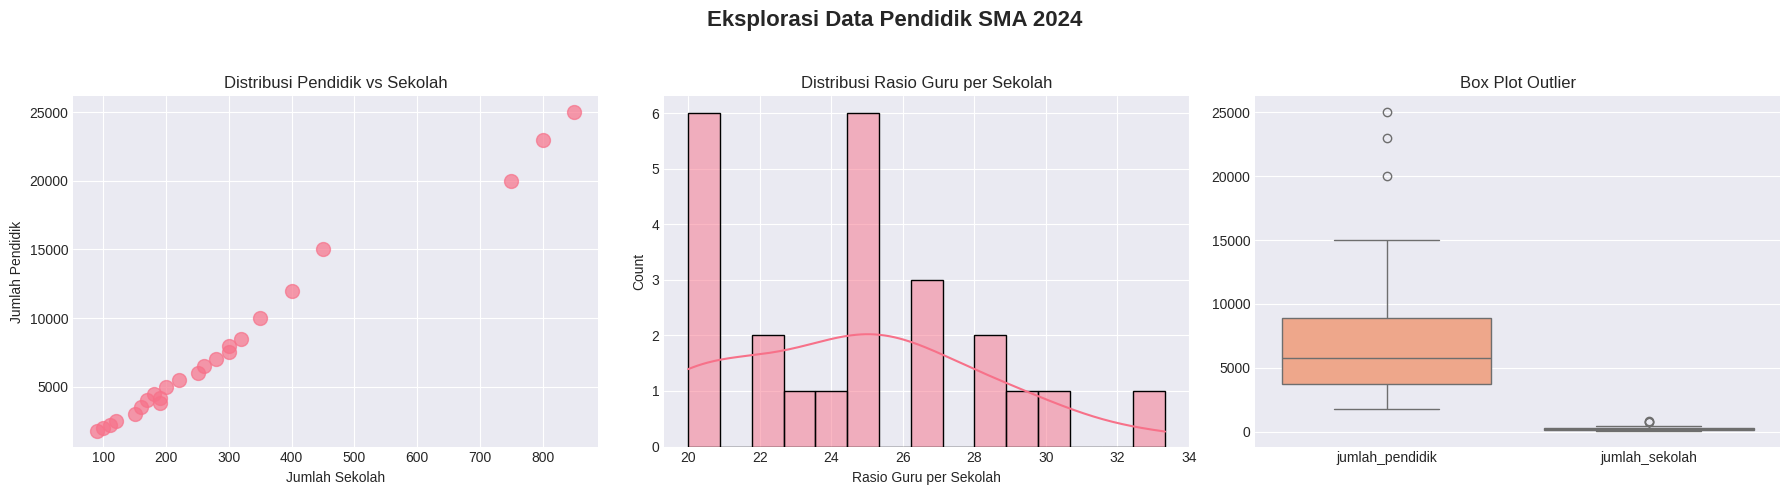


PERSIAPAN DATA

Fitur yang digunakan: ['jumlah_pendidik', 'jumlah_sekolah']
Shape data: (24, 2)
Data telah dinormalisasi menggunakan StandardScaler.

MENENTUKAN JUMLAH CLUSTER OPTIMAL


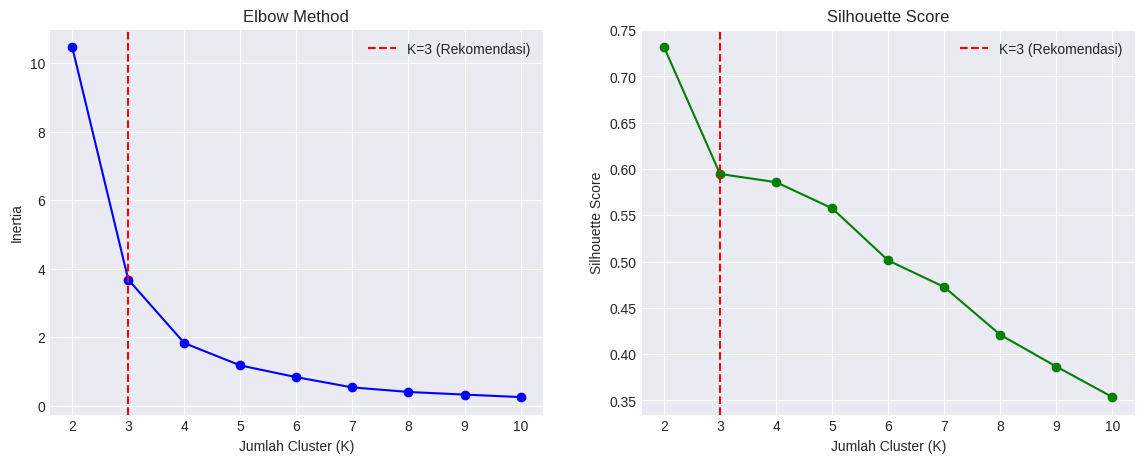


Evaluasi untuk berbagai K:
 |   K |   Inertia |   Silhouette Score |
|----:|----------:|-------------------:|
|   2 | 10.4674   |           0.731571 |
|   3 |  3.67937  |           0.594546 |
|   4 |  1.82605  |           0.585692 |
|   5 |  1.17329  |           0.557479 |
|   6 |  0.830915 |           0.501176 |
|   7 |  0.532124 |           0.472502 |
|   8 |  0.399343 |           0.420903 |
|   9 |  0.322782 |           0.386624 |
|  10 |  0.249896 |           0.353665 |

IMPLEMENTASI K-MEANS CLUSTERING (K=3)

Clustering selesai! Iterasi: 6
Inertia: 3.68 | Silhouette Score: 0.595 | Davies-Bouldin Index: 0.464

ANALISIS HASIL CLUSTERING

Ringkasan Statistik per Cluster:
 | cluster          | wilayah   | pendidik_avg   | sekolah_avg   | rasio_avg   |
|:-----------------|:----------|:---------------|:--------------|:------------|
| Kepadatan Rendah | 14        | 3892.86        | 170.71        | 22.31       |
| Kepadatan Tinggi | 3         | 22666.7        | 800           | 28.28      

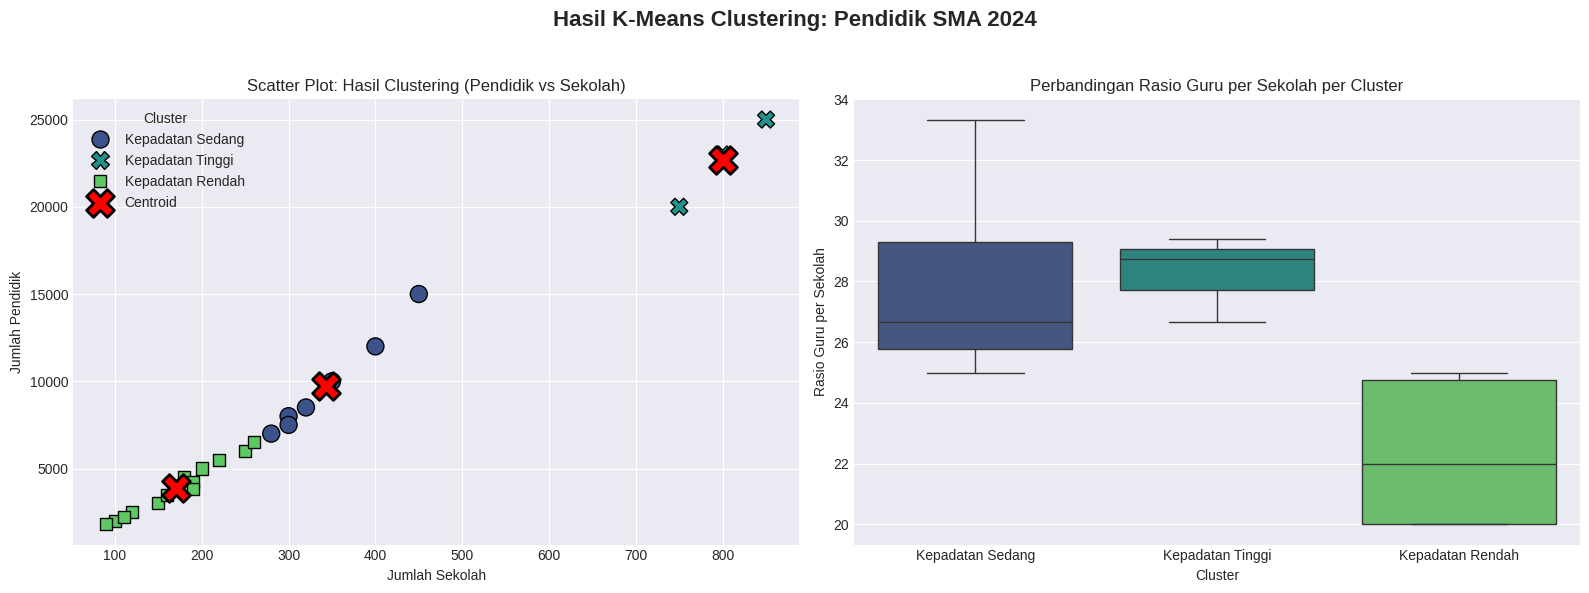


INTERPRETASI & REKOMENDASI

Cluster: 0 - Kepadatan Rendah (Rasio rata-rata: 22.31)
   REKOMENDASI: **PENAMBAHAN guru** (Rasio di bawah standar ideal 25-30)

Cluster: 1 - Kepadatan Tinggi (Rasio rata-rata: 28.28)
   ✓ STATUS: Rasio guru sudah dalam **batas ideal**.

Cluster: 2 - Kepadatan Sedang (Rasio rata-rata: 27.88)
   ✓ STATUS: Rasio guru sudah dalam **batas ideal**.

EXPORT HASIL
Hasil clustering telah disimpan ke: hasil_clustering_pendidik_sma_2024.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


ANALISIS SELESAI!


In [1]:
# K-Means Clustering: Jumlah Pendidik SMA 2024
# Analisis Pengelompokan Wilayah Berdasarkan Data Pendidik

# ==========================================
# 1. IMPORT LIBRARY
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import warnings
from google.colab import files # Tetap diperlukan untuk fungsionalitas Colab

# Mengabaikan warning dan set style
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ==========================================
# 2. LOAD DATA
# ==========================================
# Data contoh (Hapus jika Anda menggunakan file upload)
data_contoh = {
    'wilayah': ['DKI Jakarta', 'Jawa Barat', 'Jawa Tengah', 'Jawa Timur',
                'Sumatera Utara', 'Banten', 'Sulawesi Selatan', 'Kalimantan Timur',
                'Papua', 'Maluku', 'Bali', 'NTB', 'Lampung', 'Riau',
                'Sulawesi Utara', 'Kalimantan Selatan', 'Jambi', 'Bengkulu',
                'Aceh', 'Sumatera Barat', 'NTT', 'Papua Barat', 'Gorontalo', 'Maluku Utara'],
    'jumlah_pendidik': [15000, 25000, 20000, 23000, 12000, 10000, 8000, 5000,
                        3000, 2500, 6000, 4500, 7000, 6500, 4000, 5500, 4200, 3500,
                        8500, 7500, 3800, 2000, 1800, 2200],
    'jumlah_sekolah': [450, 850, 750, 800, 400, 350, 300, 200,
                       150, 120, 250, 180, 280, 260, 170, 220, 190, 160,
                       320, 300, 190, 100, 90, 110]
}
df = pd.DataFrame(data_contoh)

# Hitung rasio guru per sekolah
df['rasio_guru_per_sekolah'] = df['jumlah_pendidik'] / df['jumlah_sekolah']

# ==========================================
# 3. EKSPLORASI DATA RINGKAS
# ==========================================
print("="*60)
print("EKSPLORASI DATA AWAL")
print("="*60)
print(f"\nJumlah data: {len(df)} wilayah. Tidak ada missing value.\n")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))
print("\nStatistik Deskriptif:\n", df.describe().round(1).to_markdown(numalign="left", stralign="left"))

# ==========================================
# 4. VISUALISASI DATA AWAL (Disederhanakan)
# ==========================================
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Eksplorasi Data Pendidik SMA 2024', fontsize=16, fontweight='bold')

# Plot 1: Scatter plot
axes[0].scatter(df['jumlah_sekolah'], df['jumlah_pendidik'], alpha=0.7, s=100)
axes[0].set_xlabel('Jumlah Sekolah')
axes[0].set_ylabel('Jumlah Pendidik')
axes[0].set_title('Distribusi Pendidik vs Sekolah')

# Plot 2: Distribusi rasio guru per sekolah
sns.histplot(df['rasio_guru_per_sekolah'], bins=15, ax=axes[1], kde=True)
axes[1].set_xlabel('Rasio Guru per Sekolah')
axes[1].set_title('Distribusi Rasio Guru per Sekolah')

# Plot 3: Box Plot Jumlah Pendidik dan Sekolah (Menggunakan Seaborn untuk kemudahan)
sns.boxplot(data=df[['jumlah_pendidik', 'jumlah_sekolah']], ax=axes[2],
            orient='v', palette=['#FFA07A', '#98D8C8'])
axes[2].set_title('Box Plot Outlier')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# ==========================================
# 5. PERSIAPAN DATA UNTUK CLUSTERING
# ==========================================
print("\n" + "="*60)
print("PERSIAPAN DATA")
print("="*60)

# Pilih fitur, Normalisasi, dan Persiapan K-Means
features = ['jumlah_pendidik', 'jumlah_sekolah']
X = df[features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"\nFitur yang digunakan: {features}")
print(f"Shape data: {X.shape}")
print("Data telah dinormalisasi menggunakan StandardScaler.")

# ==========================================
# 6. MENENTUKAN JUMLAH CLUSTER OPTIMAL
# ==========================================
print("\n" + "="*60)
print("MENENTUKAN JUMLAH CLUSTER OPTIMAL")
print("="*60)

inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Visualisasi Elbow Method dan Silhouette Score
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Elbow Method
axes[0].plot(K_range, inertias, 'bo-')
axes[0].set_xlabel('Jumlah Cluster (K)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method')
axes[0].axvline(x=3, color='r', linestyle='--', label='K=3 (Rekomendasi)')
axes[0].legend()

# Silhouette Score
axes[1].plot(K_range, silhouette_scores, 'go-')
axes[1].set_xlabel('Jumlah Cluster (K)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score')
axes[1].axvline(x=3, color='r', linestyle='--', label='K=3 (Rekomendasi)')
axes[1].legend()

plt.show()

# Tampilkan tabel evaluasi
eval_df = pd.DataFrame({'K': list(K_range), 'Inertia': inertias, 'Silhouette Score': silhouette_scores})
print("\nEvaluasi untuk berbagai K:\n", eval_df.to_markdown(index=False))

# ==========================================
# 7. IMPLEMENTASI K-MEANS CLUSTERING
# ==========================================
print("\n" + "="*60)
print("IMPLEMENTASI K-MEANS CLUSTERING (K=3)")
print("="*60)

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
df['cluster'] = kmeans.fit_predict(X_scaled)

# Metrik Evaluasi Akhir
s_score = silhouette_score(X_scaled, df['cluster'])
db_score = davies_bouldin_score(X_scaled, df['cluster'])
print(f"\nClustering selesai! Iterasi: {kmeans.n_iter_}")
print(f"Inertia: {kmeans.inertia_:.2f} | Silhouette Score: {s_score:.3f} | Davies-Bouldin Index: {db_score:.3f}")

# ==========================================
# 8. ANALISIS HASIL CLUSTERING RINGKAS
# ==========================================
print("\n" + "="*60)
print("ANALISIS HASIL CLUSTERING")
print("="*60)

# Buat label cluster
cluster_labels = {}
# Menghitung rata-rata pendidik untuk penentuan label
avg_pendidik = df.groupby('cluster')['jumlah_pendidik'].mean()

for i in range(optimal_k):
    if avg_pendidik[i] > 15000:
        cluster_labels[i] = 'Kepadatan Tinggi'
    elif avg_pendidik[i] > 7000:
        cluster_labels[i] = 'Kepadatan Sedang'
    else:
        cluster_labels[i] = 'Kepadatan Rendah'

df['label_cluster'] = df['cluster'].map(cluster_labels)

# Ringkasan per cluster
summary = df.groupby('cluster').agg(
    wilayah=('wilayah', 'count'),
    pendidik_avg=('jumlah_pendidik', 'mean'),
    sekolah_avg=('jumlah_sekolah', 'mean'),
    rasio_avg=('rasio_guru_per_sekolah', 'mean')
).round(2).rename(index=cluster_labels)

print("\nRingkasan Statistik per Cluster:\n", summary.to_markdown(numalign="left", stralign="left"))

# Tampilkan wilayah per cluster
print("\nWilayah dalam setiap Cluster:")
for i in range(optimal_k):
    wilayah_list = df[df['cluster'] == i]['wilayah'].values
    print(f"  • Cluster {i} ({cluster_labels[i]}): {', '.join(wilayah_list)}")


# ==========================================
# 9. VISUALISASI HASIL CLUSTERING (Disederhanakan)
# ==========================================
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Hasil K-Means Clustering: Pendidik SMA 2024', fontsize=16, fontweight='bold')

# Plot 1: Scatter plot dengan cluster
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

sns.scatterplot(data=df, x='jumlah_sekolah', y='jumlah_pendidik', hue='label_cluster',
                style='label_cluster', s=150, ax=axes[0], palette='viridis', legend='full',
                edgecolor='black')
axes[0].scatter(centroids[:, 1], centroids[:, 0], marker='X', s=400, c='red',
                  edgecolors='black', linewidth=2, label='Centroid', zorder=5)
axes[0].set_xlabel('Jumlah Sekolah')
axes[0].set_ylabel('Jumlah Pendidik')
axes[0].set_title('Scatter Plot: Hasil Clustering (Pendidik vs Sekolah)')
axes[0].legend(title='Cluster')


# Plot 2: Box plot rasio guru per sekolah per cluster
sns.boxplot(data=df, x='label_cluster', y='rasio_guru_per_sekolah', ax=axes[1],
            palette='viridis')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Rasio Guru per Sekolah')
axes[1].set_title('Perbandingan Rasio Guru per Sekolah per Cluster')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# ==========================================
# 10. INTERPRETASI DAN REKOMENDASI RINGKAS
# ==========================================
print("\n" + "="*60)
print("INTERPRETASI & REKOMENDASI")
print("="*60)

for cluster, label in cluster_labels.items():
    avg_rasio = summary.loc[label, 'rasio_avg']
    print(f"\nCluster: {cluster} - {label} (Rasio rata-rata: {avg_rasio:.2f})")

    if avg_rasio < 25:
        print("   REKOMENDASI: **PENAMBAHAN guru** (Rasio di bawah standar ideal 25-30)")
    elif avg_rasio > 35:
        print("   REKOMENDASI: **SURPLUS guru** (Pertimbangkan redistribusi)")
    else:
        print("   ✓ STATUS: Rasio guru sudah dalam **batas ideal**.")

# ==========================================
# 11. EXPORT HASIL
# ==========================================
print("\n" + "="*60)
print("EXPORT HASIL")
print("="*60)

hasil_df = df[['wilayah', 'jumlah_pendidik', 'jumlah_sekolah',
               'rasio_guru_per_sekolah', 'cluster', 'label_cluster']].sort_values('cluster')
hasil_df.to_csv('hasil_clustering_pendidik_sma_2024.csv', index=False)
print("Hasil clustering telah disimpan ke: hasil_clustering_pendidik_sma_2024.csv")

try:
    files.download('hasil_clustering_pendidik_sma_2024.csv')
except Exception as e:
    print("Gagal auto-download. Pastikan Anda menjalankan kode di Google Colab.")

print("\n" + "="*60)
print("ANALISIS SELESAI!")
print("="*60)